In [4]:
import pandas as pd
def format_city(a): #this func to emphasize the countries
    a["name"]
    return a["name"]
countries = ["England","Wales"]

In [8]:
teams = pd.read_json('teams.json')
teams["country"] = teams["area"].apply(format_city) #to extract the countries from the first columns which is a dict
teams = teams.loc[teams["country"].isin(countries)].reset_index(drop = True)
teams = teams.loc[teams["type"] != "national"] #drop wales and england because it is national club
teams

,area,city,name,officialName,type,wyId,country
0,"{'name': 'England', 'id': '0', 'alpha3code': '...",Newcastle upon Tyne,Newcastle United,Newcastle United FC,club,1613,England
1,"{'name': 'England', 'id': '0', 'alpha3code': '...","Huddersfield, West Yorkshire",Huddersfield Town,Huddersfield Town FC,club,1673,England
2,"{'name': 'Wales', 'id': '0', 'alpha3code': 'XW...",Swansea,Swansea City,Swansea City AFC,club,10531,Wales
3,"{'name': 'England', 'id': '0', 'alpha3code': '...","Bournemouth, Dorset",AFC Bournemouth,AFC Bournemouth,club,1659,England
4,"{'name': 'England', 'id': '0', 'alpha3code': '...","Brighton, East Sussex",Brighton & Hove Albion,Brighton & Hove Albion FC,club,1651,England
5,"{'name': 'England', 'id': '0', 'alpha3code': '...","Burnley, Lancashire",Burnley,Burnley FC,club,1646,England
6,"{'name': 'England', 'id': '0', 'alpha3code': '...",Leicester,Leicester City,Leicester City FC,club,1631,England
7,"{'name': 'England', 'id': '0', 'alpha3code': '...",London,West Ham United,West Ham United FC,club,1633,England
8,"{'name': 'England', 'id': '0', 'alpha3code': '...",Stoke-on-Trent,Stoke City,Stoke City FC,club,1639,England
9,"{'name': 'England', 'id': '0', 'alpha3code': '...",Watford,Watford,Watford FC,club,1644,England


In [9]:
coaches = pd.read_json("coaches.json")

In [10]:
team_id = set(teams["wyId"].unique())
coaches_id = set(coaches["currentTeamId"].unique())

In [374]:
matches = pd.read_json("matches_England.json")



def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # [Away.strip()],Score_home.strip(),Score_away.strip()
    return Home.strip()
matches["First_team"] = matches["label"].apply(format_score_team)
def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # Away.strip(),Score_home.strip(),Score_away.strip()
    return Away.strip()
matches["Second_team"] = matches["label"].apply(format_score_team)
def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # Away.strip(),Score_home.strip(),Score_away.strip()
    return Score_home.strip()
matches["Score_first"] = matches["label"].apply(format_score_team)
def format_score_team(a):#this func to emphasize the countries
    a = list(a)
    a = "".join(a).split(',')
    Home,Away = a[0].split('-')
    Score_home,Score_away = a[1].split('-')
    # Away.strip(),Score_home.strip(),Score_away.strip()
    return Score_away.strip()
matches["Score_second"] = matches["label"].apply(format_score_team)

# the script to match the number of team and the name of team

name_number = dict(zip(list(teams["name"]),list(teams["wyId"])))
commands_numbers_1 = []
commands_numbers_2 = []
for i in matches.index:
    commands_numbers_1.append(name_number[matches["First_team"][i]])
    commands_numbers_2.append(name_number[matches["Second_team"][i]])
matches["First_command_id"] = commands_numbers_1
matches["Second_command_id"] = commands_numbers_2

def extractTeamsData(data,First_command_id,Second_command_id,i):
    a = pd.io.json.json_normalize((matches['teamsData'])[i][str(matches[str(First_command_id)][i])])
    b = pd.io.json.json_normalize((matches['teamsData'])[i][str(matches[str(Second_command_id)][i])])
    pref_1,pref_2 = a["side"][0],b["side"][0] #to understand for which command i have opened the dictrionary
    col_1,col_2 = list(a.columns),list(b.columns) 
    a.columns = list(map(lambda x: x + "_" + pref_1,col_1)) #add the prefix for columns to understand data belongs
    b.columns = list(map(lambda x: x + "_" + pref_2,col_2)) #add the prefix for columns to understand data belongs
    res = pd.merge( a,b,on = a.index,how='outer') #merge the 2 datas because it is for one match
    return res

data = pd.DataFrame()
for i in matches.index:
    data = data.append(extractTeamsData(matches,str("First_command_id"),str("Second_command_id"),i)) #create DataFrame of the teamData columns
data.reset_index(drop = True,inplace=True)
drop_col = ["key_0"]
data.drop(drop_col, inplace=True, axis=1)

matches_data = pd.merge(matches,data,on = matches.index,how='outer') #merge matches and data
drop_col = ["key_0"]
matches_data.drop(drop_col, inplace=True, axis=1)

C:\Users\cecco\Anaconda3\lib\site-packages\pandas\core\frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


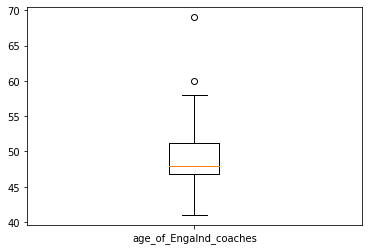

In [484]:
from datetime import date
import matplotlib.pyplot as plt
matches_data1 = matches_data[['coachId_home','teamId_home']]
matches_data1.rename(columns={'coachId_home':'coachId','teamId_home':'teamId'},inplace = True)
matches_data2 = matches_data[['coachId_away','teamId_away']]
matches_data2.rename(columns={'coachId_away':'coachId','teamId_away':'teamId'},inplace = True)
result = pd.concat([matches_data1,matches_data2] )
result2= result[result['coachId'].map(int) != 0]
result3 = result2.drop_duplicates()
result3 = result3.reset_index(drop = True)
team = teams['area']
team = pd.io.json.json_normalize(team)
team2 = teams[['city','name','officialName','type','wyId']]
team3 = pd.concat([team,team2],axis=1)
team3 = team3.rename(columns={"wyId":"teamId"})
result4 = pd.merge(result3,team3,on = "teamId")
#coaches1 = coaches.dropna(subset=['birthDate'])
#coaches1 = coaches1.reset_index(drop=True)
team2 = coaches1.rename(columns={"wyId":"coachId"})
result5 = pd.merge(result4,team2,on = "coachId")
result6 = result5.groupby(['officialName'])['birthDate'].max().reset_index().rename(columns={'officialName':'OfficialName','birthDate' : 'BirthDateCoach'})
today = date.today().isoformat()
year_today,month_today,day_today = map(int,today.split("-"))
list_date = []
for x in result6["BirthDateCoach"]:
    year,month,day = map(int,x.split("-"))
    if month > month_today:
        age = year_today - year - 1
    elif month == month_today and day > day_today:
        age = year_today - year - 1
    else:
        age = year_today - year
    list_date.append(age) #calcolate age 
data = pd.DataFrame({'AgeCoach':list_date})
result7 = pd.concat([result6, data], axis=1)
result7  = result7.sort_values(by = 'BirthDateCoach',ascending = False)
result7  = result7.reset_index(drop = True)
result8 = result7.head(10)
plt.boxplot(list_date,labels=['age_of_Engalnd_coaches'])
plt.show()

In [485]:
result8


,OfficialName,BirthDateCoach,AgeCoach
0,AFC Bournemouth,1977-11-29,41
1,Watford FC,1977-07-12,42
2,Leicester City FC,1975-12-04,43
3,Everton FC,1973-10-16,46
4,Newcastle United FC,1973-02-19,46
5,Tottenham Hotspur FC,1972-03-02,47
6,Swansea City AFC,1972-01-08,47
7,Huddersfield Town FC,1971-10-19,47
8,Southampton FC,1971-10-05,48
9,Burnley FC,1971-06-28,48


0     41
1     42
2     46
3     59
4     47
5     47
6     48
7     48
8     49
9     52
10    52
11    60
12    60
13    72
Name: age, dtype: int64


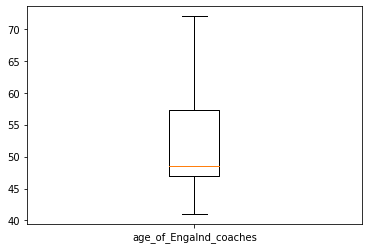

In [312]:
from datetime import date
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

today = date.today().isoformat()
year_today,month_today,day_today = map(int,today.split("-"))
coaches1 = coaches.dropna(subset=['birthDate'])
coaches1 = coaches1.reset_index(drop=True)
list_date = []
for x in coaches1["birthDate"]:
    year,month,day = map(int,x.split("-"))
    if month > month_today:
        age = year_today - year - 1
    elif month == month_today and day > day_today:
        age = year_today - year - 1
    else:
        age = year_today - year
    list_date.append(age) #calcolate age 
data = pd.DataFrame({'age':list_date})
coaches2 = pd.concat([coaches1, data], axis=1)
coaches2 = coaches2.sort_values(by = 'age',ascending = True)
coaches2 = coaches2.reset_index(drop = True)
coaches3 = coaches2[coaches2['currentTeamId'].map(int) != 0] #select coaches with a team
coaches3 = coaches3.reset_index(drop = True)
dbteams2 = dbteams.rename(columns={"wyId":"currentTeamId"})
coaches4 = pd.merge(coaches3,dbteams2,on = "currentTeamId",how = 'left')
coaches5 = coaches4.head(10)
team = teams['area']
team = pd.io.json.json_normalize(team)
team2 = teams[['city','name','officialName','type','wyId']]
team3 = pd.concat([team,team2],axis=1)
team3 = team3.rename(columns={"wyId":"currentTeamId"})
coaches4 = pd.merge(coaches3,team3,on = "currentTeamId")
lst = []
age_coaches = coaches4['age']
print(age_coaches)
for x in age_coaches:
    lst.append(x)
plt.boxplot(lst,labels=['age_of_Engalnd_coaches'])
plt.show()

In [308]:
M_E = pd.read_json('matches_England.json')

In [309]:
M_E

,competitionId,date,dateutc,duration,gameweek,label,referees,roundId,seasonId,status,teamsData,venue,winner,wyId
0,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Burnley - AFC Bournemouth, 1 - 2","[{'refereeId': 385705, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1646': {'scoreET': 0, 'coachId': 8880, 'side...",Turf Moor,1659,2500089
1,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Crystal Palace - West Bromwich Albion, 2 - 0","[{'refereeId': 381851, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1628': {'scoreET': 0, 'coachId': 8357, 'side...",Selhurst Park,1628,2500090
2,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Huddersfield Town - Arsenal, 0 - 1","[{'refereeId': 384965, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1609': {'scoreET': 0, 'coachId': 7845, 'side...",The John Smith's Stadium,1609,2500091
3,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Liverpool - Brighton & Hove Albion, 4 - 0","[{'refereeId': 385704, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1651': {'scoreET': 0, 'coachId': 8093, 'side...",Anfield,1612,2500092
4,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Manchester United - Watford, 1 - 0","[{'refereeId': 381853, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1644': {'scoreET': 0, 'coachId': 93112, 'sid...",Old Trafford,1611,2500093
5,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Newcastle United - Chelsea, 3 - 0","[{'refereeId': 384888, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1613': {'scoreET': 0, 'coachId': 210700, 'si...",St. James' Park,1613,2500094
6,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Southampton - Manchester City, 0 - 1","[{'refereeId': 385911, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1625': {'scoreET': 0, 'coachId': 267136, 'si...",St. Mary's Stadium,1625,2500095
7,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Swansea City - Stoke City, 1 - 2","[{'refereeId': 378952, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'10531': {'scoreET': 0, 'coachId': 32573, 'si...",Liberty Stadium,1639,2500096
8,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"Tottenham Hotspur - Leicester City, 5 - 4","[{'refereeId': 378951, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1631': {'scoreET': 0, 'coachId': 209010, 'si...",Wembley Stadium,1624,2500097
9,364,"May 13, 2018 at 4:00:00 PM GMT+2",2018-05-13 14:00:00,Regular,38,"West Ham United - Everton, 3 - 1","[{'refereeId': 408156, 'role': 'referee'}, {'r...",4405654,181150,Played,"{'1623': {'scoreET': 0, 'coachId': 8541, 'side...",London Stadium,1633,2500098


In [311]:
M_E['teamsData'].head(2)

0    {'1646': {'scoreET': 0, 'coachId': 8880, 'side...
1    {'1628': {'scoreET': 0, 'coachId': 8357, 'side...
Name: teamsData, dtype: object

In [ ]:
for i in range (0,len(M_E)):
    teamsData = M_E['teamsData']
    #teamsData.drop('formation')
    #d = c.iloc[:,1]
    #f = d['teamId']
    #for index, val in d.iteritems():
     #   print (index, val)
x = pd.io.json.json_normalize('teamsData')
print(x)
    
